# 第25课 Bayes贝叶斯识别Spam Email垃圾邮件


Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

Python源文件及数据下载链接: https://github.com/rayc2020/LessonPythonCode

Bernoulli Naive Bayes : It assumes that all our features are binary such that they take only two values. Means 0s can represent “word does not occur in the document” and 1s as "word occurs in the document" .

Multinomial Naive Bayes : Its is used when we have discrete data (e.g. movie ratings ranging 1 and 5 as each rating will have certain frequency to represent). In text learning we have the count of each word to predict the class or label.

Gaussian Naive Bayes : Because of the assumption of the normal distribution, Gaussian Naive Bayes is used in cases when all our features are continuous. For example in Iris dataset features are sepal width, petal width, sepal length, petal length. So its features can have different values in data set as width and length can vary. We can’t represent features in terms of their occurrences. This means data is continuous. Hence we use Gaussian Naive Bayes here.

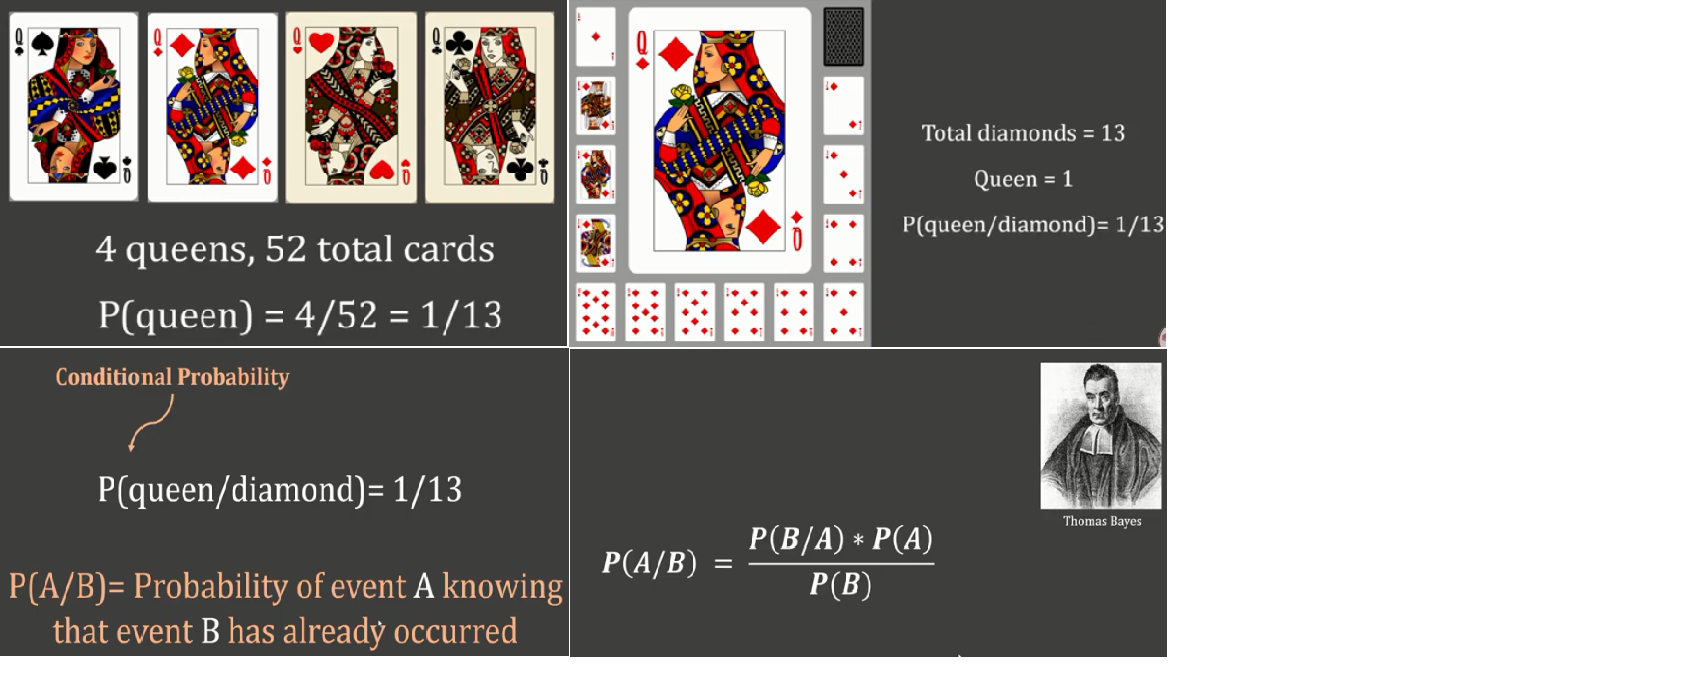

In [5]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson25-card1.png')

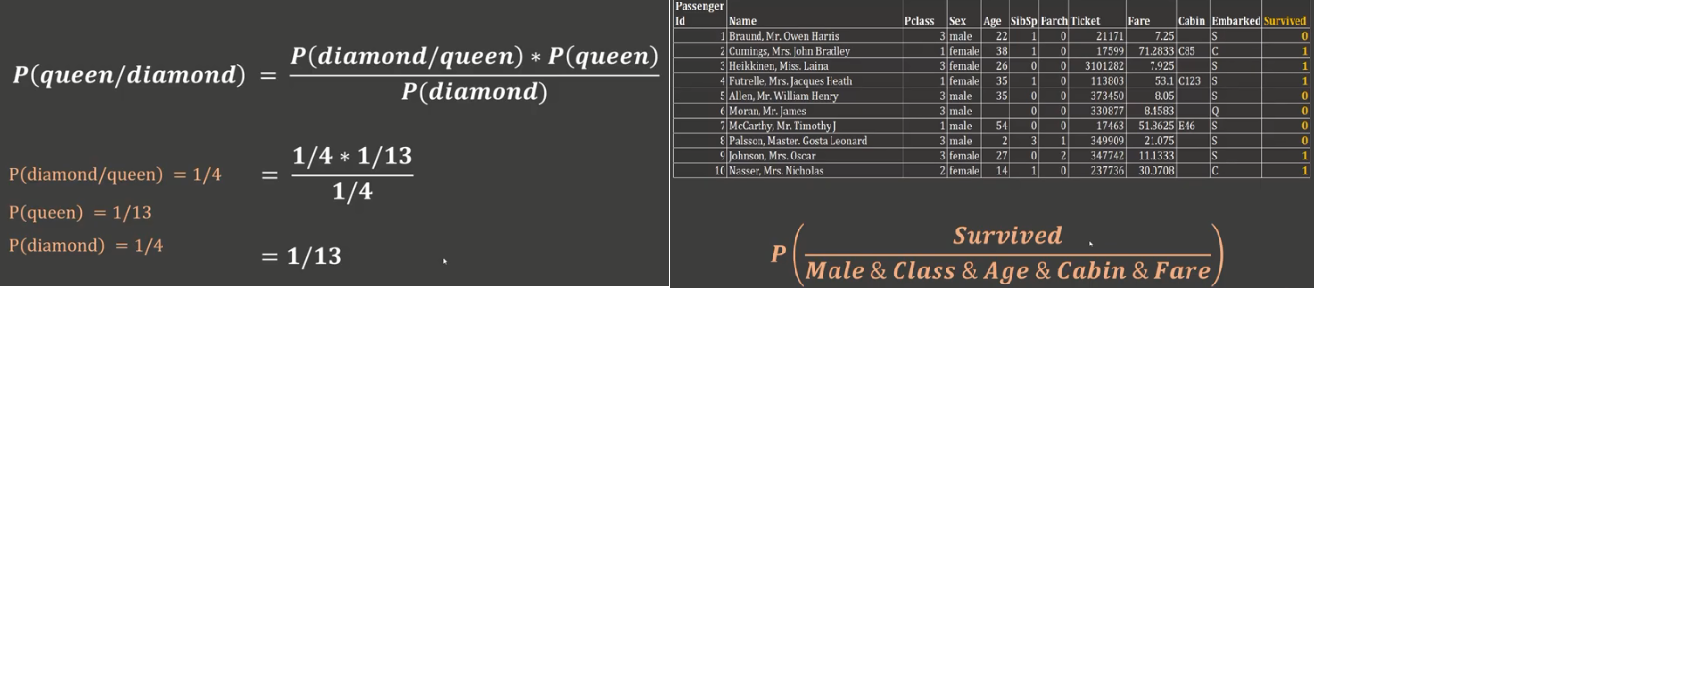

In [6]:
from IPython.display import Image
Image(filename='D:\\python\\Project0-Python-MachineLearning\\Lesson25-card2.png')

## (1)应用Gaussian Naive Bayes

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Lesson18-titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [5]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [6]:
X = df.drop('Survived',axis='columns')
y = df.Survived

In [7]:
X

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [8]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [9]:
dummies = pd.get_dummies(X.Sex)

In [10]:
dummies

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [11]:
X = pd.concat([X,dummies],axis='columns')

In [12]:
X

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,0,1
887,1,female,19.0,30.0000,1,0
888,3,female,NaN,23.4500,1,0
889,1,male,26.0,30.0000,0,1


In [13]:
X.drop(['Sex','male'],axis='columns',inplace=True)

In [14]:
X

,Pclass,Age,Fare,female
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0
...,...,...,...,...
886,2,27.0,13.0000,0
887,1,19.0,30.0000,1
888,3,NaN,23.4500,1
889,1,26.0,30.0000,0


In [15]:
X.columns[X.isna().any()]

Index(['Age'], dtype='object')

In [16]:
X['Age'].isnull().sum() #对于Age更深入的处理请参考第18课和21课

177

In [17]:
X.Age = X.Age.fillna(X.Age.mean())

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [19]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [20]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
model.score(X_test,y_test)

0.7910447761194029

In [22]:
X_test[0:10]

,Pclass,Age,Fare,female
763,1,36.000000,120.0000,1
760,3,29.699118,14.5000,0
50,3,7.000000,39.6875,0
512,1,36.000000,26.2875,0
667,3,29.699118,7.7750,0
858,3,24.000000,19.2583,1
367,3,29.699118,7.2292,1
68,3,17.000000,7.9250,1
449,1,52.000000,30.5000,0
32,3,29.699118,7.7500,1


In [23]:
y_test[0:10]

763    1
760    0
50     0
512    1
667    0
858    1
367    1
68     1
449    1
32     1
Name: Survived, dtype: int64

In [25]:
model.predict(X_test[0:10])

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [26]:
model.predict_proba(X_test[:10])

array([[0.00116269, 0.99883731],
       [0.95793477, 0.04206523],
       [0.9117202 , 0.0882798 ],
       [0.73787789, 0.26212211],
       [0.95763954, 0.04236046],
       [0.40673298, 0.59326702],
       [0.42760851, 0.57239149],
       [0.37519516, 0.62480484],
       [0.71780501, 0.28219499],
       [0.42810588, 0.57189412]])

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.808     , 0.776     , 0.776     , 0.70967742, 0.77419355])

In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test[0:10],model.predict(X_test[0:10])))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.71      0.83         7

    accuracy                           0.80        10
   macro avg       0.80      0.86      0.79        10
weighted avg       0.88      0.80      0.81        10



## (2)应用Multinomial Naive Bayes

In [30]:
df1 = pd.read_csv("Lesson25-spam_ham_dataset.csv")

In [31]:
df1

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [32]:
df1 = df1.drop(df1.columns[[0, 1]], axis=1) 

In [33]:
df1

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


In [34]:
df1.groupby('label_num').describe()

text                                                               
          count unique                                                top freq
label_num                                                                     
0          3672   3531  Subject: calpine daily gas nomination\r\n>\r\n...   20
1          1499   1462                                      Subject: \r\n   16

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.text,df1.label_num)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_T = v.fit_transform(X_train.values)
X_train_T.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### 插曲：CountVectorizer 举例说明

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

In [43]:
vectorizer = CountVectorizer()

In [44]:
X = vectorizer.fit_transform(corpus)

In [45]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [46]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [47]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))

In [48]:
X2 = vectorizer2.fit_transform(corpus)

In [50]:
print(vectorizer2.get_feature_names())

['and this', 'document is', 'first document', 'is the', 'is this', 'second document', 'the first', 'the second', 'the third', 'third one', 'this document', 'this is', 'this the']


In [51]:
print(X2.toarray())

[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


### 插曲：CountVectorizer 举例说明结束

In [52]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_T,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [53]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_T = v.transform(emails)
model.predict(emails_T)

array([0, 1], dtype=int64)

In [54]:
X_test_T = v.transform(X_test)
model.score(X_test_T, y_test)

0.9737045630317092

### Sklearn Pipeline 老外真的很懒，发明了pipeline替代transform几行代码

In [55]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [56]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [57]:
clf.score(X_test,y_test)

0.9737045630317092

In [58]:
clf.predict(emails)

array([0, 1], dtype=int64)